<a href="https://colab.research.google.com/github/licciard/fun-stuff/blob/main/math/sinpdf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sympy
import mpmath
import numpy as np
mpmath.mp.dps = 15
print(mpmath.mp)
#sympy.init_session()
sympy.init_printing(use_latex=False)
import scipy.special as scp
import scipy.optimize as opt

import matplotlib.pyplot as plt
%matplotlib inline

Mpmath settings:
  mp.prec = 53                [default: 53]
  mp.dps = 15                 [default: 15]
  mp.trap_complex = False     [default: False]


In [ ]:
def sin_pdf(t):
  return mpmath.power(2*mpmath.cos(t/2),n)*mpmath.sin(n*t/2)

mpmath.mp.dps = 25
for n in range(1,100,5):
  #isin = mpmath.quad(lambda x: sin_pdf(x)*(mpmath.sin(x)+x),[0,mpmath.pi])
  #isin = mpmath.quad(lambda x: sin_pdf(x)*sinfunc(float(x),-2.88728136,0.41483409,-0.00426036,0.89128764),[0,mpmath.pi])
  #isin = mpmath.quad(lambda x: sin_pdf(x)*(x**2),[0,mpmath.pi])
  isin = mpmath.quad(lambda x: sin_pdf(x)*mpmath.sin(x/4),[0,mpmath.pi])
  print("{}: {} {}".format(n,isin,isin/n**(1/4)))

1: 0.754247233265650692694234 0.754247233265650692694234
6: 1.955563348086746820672075 1.24949371617677989665267
11: 2.488718443388861946918694 1.366556508713512985208717
16: 2.851470864766812563947484 1.425735432383406281973742
21: 3.131945660208263354979224 1.463050762064300593539961
26: 3.363083795905905929397655 1.489341707005268754646409
31: 3.561024191649278716986052 1.50915727144337704587455
36: 3.73495013686179806689023 1.524787008341600398589935
41: 3.890616588528453520566323 1.537526005100446714051677
46: 4.031883240700906727704048 1.548169434621883193996882
51: 4.161472628562074646798373 1.557236227038384745388615
56: 4.281381623424145704118947 1.565081413476027595611685
61: 4.393121176435071551717808 1.571957224175300531095907
66: 4.497864008758319072539673 1.578048463391223526391259
71: 4.596539795768216469037841 1.583494055344332443974124
76: 4.689898845935372851774226 1.588400728834672311103518
81: 4.778556062609528324967269 1.59285202086984277498909
86: 4.86302213786424

In [ ]:
def eta_corrterm(t):
  theta = mpmath.exp(t*mpmath.j)
  return -mpmath.log(mpmath.fabs(1-mpmath.power(2,-theta)))

def loggamma_term(t):
  theta = mpmath.exp(t*mpmath.j)
  return -mpmath.log(mpmath.fabs(mpmath.gamma(1+theta)))

def integral_term(t):
  theta = mpmath.exp(t*mpmath.j)
  integral = mpmath.quad(lambda x:mpmath.power(x,theta)/(1+mpmath.exp(x)),[0,100])
  return mpmath.log(mpmath.fabs(integral))

Nt = 500 #0
dt = np.arange(0,0.7*mpmath.pi,2*mpmath.pi/Nt)

deta = [mpmath.diff(eta_corrterm,t) for t in dt]
d2eta = [mpmath.diff(eta_corrterm,t,2) for t in dt]
d3eta = [mpmath.diff(eta_corrterm,t,3) for t in dt]

dloggamma = [mpmath.diff(loggamma_term,t) for t in dt]
dintegral = [mpmath.diff(integral_term,t) for t in dt]
dsumterm = [x+y for x,y in zip(dloggamma,dintegral)]

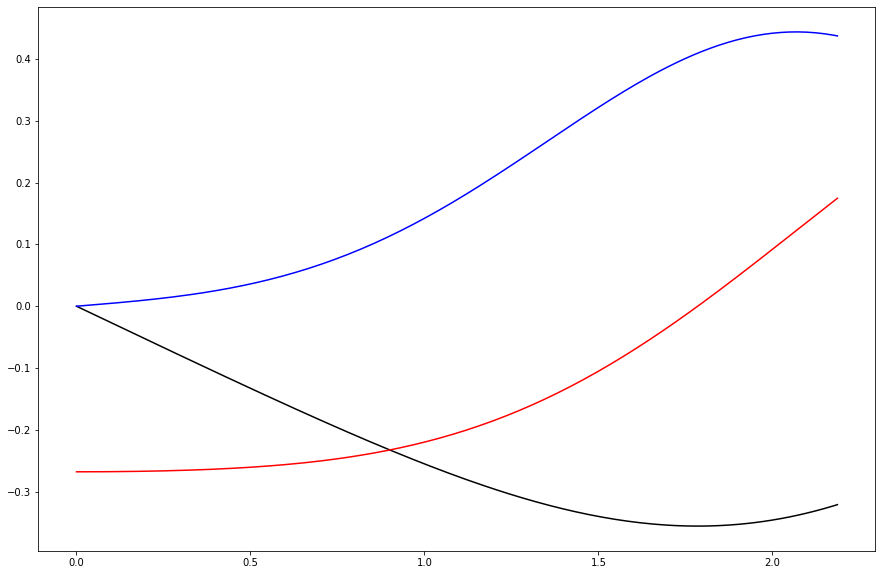

In [ ]:
plt.figure(figsize=(15,10))

plt.plot(dt, deta, 'k-')
plt.plot(dt, d2eta, 'r-')
plt.plot(dt, d3eta, 'b-')
#plt.plot(dt, dzetasum_both_imag, 'g.')
#plt.plot(dt, adzeta_both_real, 'c.')

axes = plt.gca()

plt.show()

In [ ]:
from scipy.optimize import curve_fit

def sinfunc(x, a1,a2,a3,a4,a5,a6):#,a7,a8,a9,a10,a11,a12,a13):
    return  a1 * np.sin(x) + a2 * np.sin(x/2)  + a3 * np.sin(x/3)  + a4 * np.sin(x/4) + a5 * np.sin(x/5) + a6 * np.sin(x/6)  #+ a7 * np.sin(x/7)  + a8 * np.sin(x/8) + a9 * np.sin(x/9) + a10 * np.sin(x/10.)  + a11 * np.sin(x/11)  + a12 * np.sin(x/12) + a13 * np.sin(x/13)
#def sinfunc(x, a2,a3,a4,a5):
#    return  a2 * np.sin(x/1.2) + a3 * np.sin(x/1.3)  + a4 * np.sin(x/1.4)  + a5 * np.sin(x/1.5)  + a6 * np.sin(x/1.4)  + a7 * np.sin(x/1.5)  + a9 * np.sin(x/1.9)
  
popt, pcov = curve_fit(sinfunc, dt, deta)
print(popt)

[ 3.40776685e+00 -1.06964420e+02  2.72814676e+01 -1.42167385e+01
  3.23302414e+03 -3.61402572e+03]


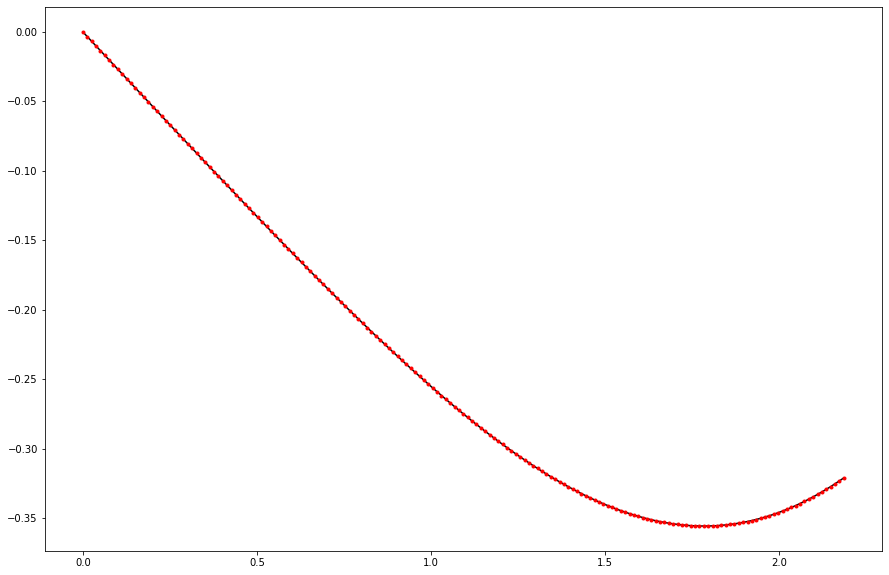

In [ ]:
deta_fit = [sinfunc(float(t),  *popt) for t in dt]

plt.figure(figsize=(15,10))

plt.plot(dt, deta, 'k-')
plt.plot(dt, deta_fit, 'r.')
#plt.plot(dt[1:], np.array(deta[1:])/np.array(deta_fit[1:]), 'g.')
#plt.plot(dt, adzeta_both_real, 'c.')

axes = plt.gca()

plt.show()

In [ ]:
popt, pcov = curve_fit(sinfunc, dt, dloggamma)
print(popt)


[  5.06967002 -24.17833766  24.24473546]


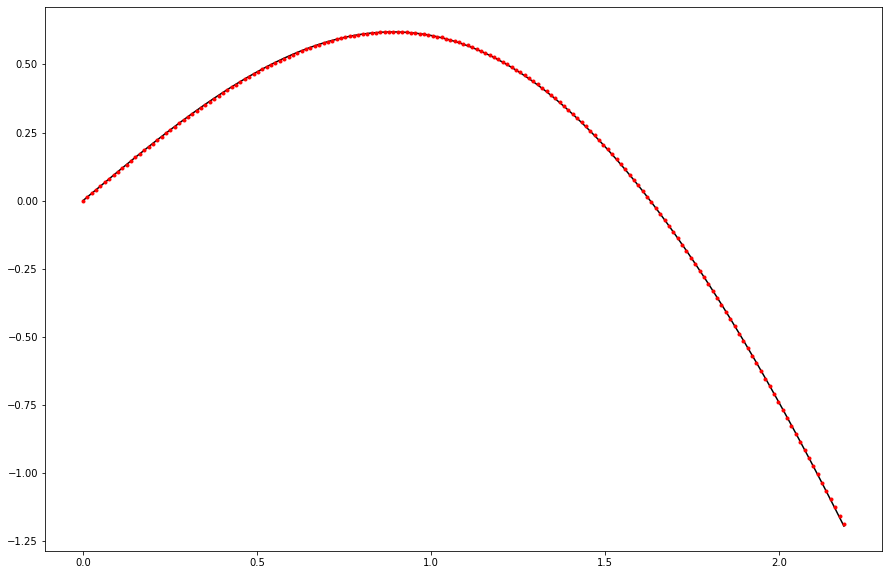

In [ ]:

dloggamma_fit = [sinfunc(float(t), *popt) for t in dt]

plt.figure(figsize=(15,10))

plt.plot(dt, dloggamma, 'k-')
plt.plot(dt, dloggamma_fit, 'r.')
#plt.plot(dt[1:], np.array(dloggamma[1:])/np.array(dloggamma_fit[1:]), 'g.')
#plt.plot(dt, adzeta_both_real, 'c.')

axes = plt.gca()

plt.show()

In [ ]:
popt, pcov = curve_fit(sinfunc, dt, dintegral)
print(popt)

[ -4.46301611  20.02538775 -19.95204874]


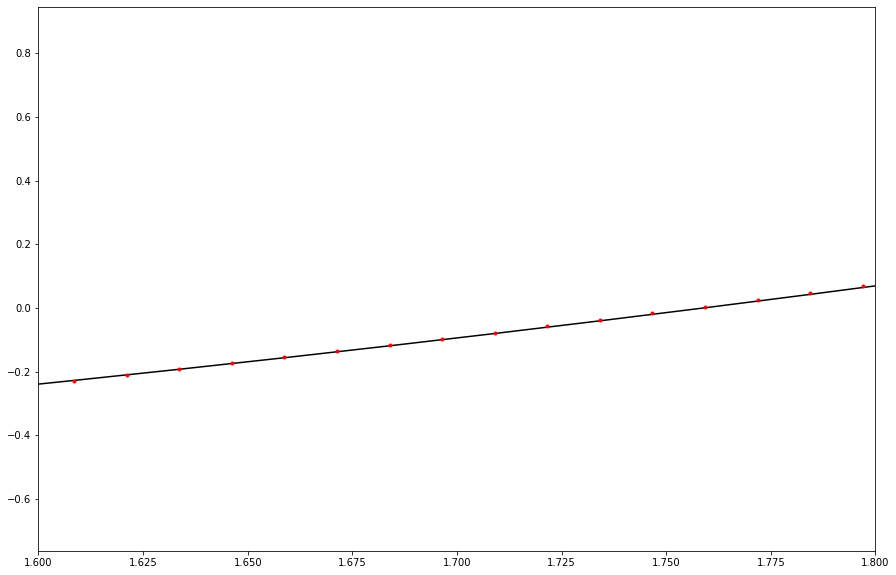

In [ ]:
dintegral_fit = [sinfunc(float(t), *popt) for t in dt]

plt.figure(figsize=(15,10))

plt.plot(dt, dintegral, 'k-')
plt.plot(dt, dintegral_fit, 'r.')
#plt.plot(dt[1:], np.array(dloggamma[1:])/np.array(dloggamma_fit[1:]), 'g.')
#plt.plot(dt, adzeta_both_real, 'c.')

axes = plt.gca()
axes.set_xlim([1.6,1.8])

plt.show()

In [ ]:
popt, pcov = curve_fit(sinfunc, dt, dsumterm)
print(popt)

[ 0.60665396 -4.15295042  4.29268736]


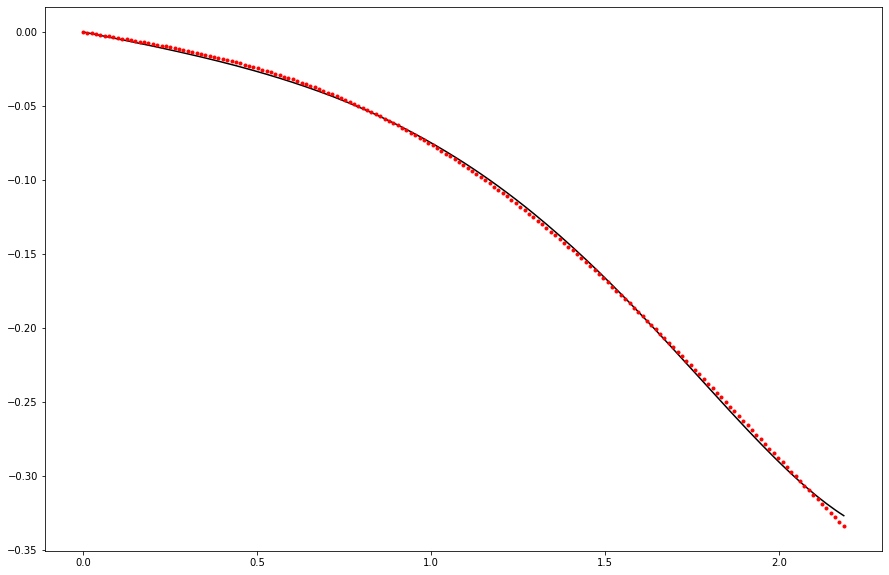

In [ ]:
dsumterm_fit = [sinfunc(float(t), *popt) for t in dt]

plt.figure(figsize=(15,10))

plt.plot(dt, dsumterm, 'k-')
plt.plot(dt, dsumterm_fit, 'r.')
#plt.plot(dt[1:], np.array(dloggamma[1:])/np.array(dloggamma_fit[1:]), 'g.')
#plt.plot(dt, adzeta_both_real, 'c.')

axes = plt.gca()
#axes.set_xlim([1.6,1.8])

plt.show()

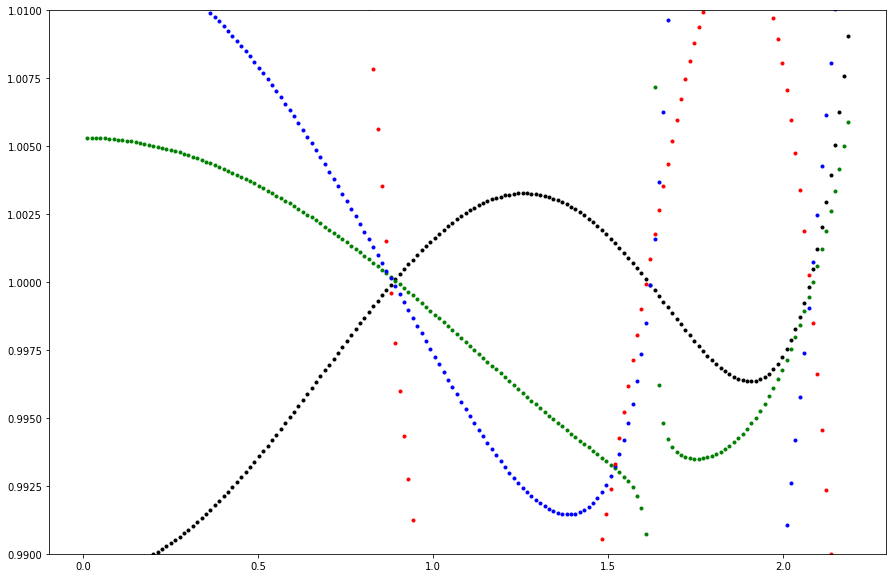

In [ ]:
plt.figure(figsize=(15,10))

plt.plot(dt[1:], np.array(deta[1:])/np.array(deta_fit[1:]), 'k.')
plt.plot(dt[1:], np.array(dloggamma[1:])/np.array(dloggamma_fit[1:]), 'g.')
plt.plot(dt[1:], np.array(dintegral[1:])/np.array(dintegral_fit[1:]), 'b.')
plt.plot(dt[1:], np.array(dsumterm[1:])/np.array(dsumterm_fit[1:]), 'r.')

axes = plt.gca()
#axes.set_xlim([1.7,2])
axes.set_ylim([0.99,1.01])
plt.show()

In [ ]:
dx2 = [t for t in dt]
popt, pcov = curve_fit(sinfunc, dt, dx2)
print(popt)

[-1.59595342e-03  3.29820485e-01 -2.65299771e+00  6.88742783e-01
  1.98089106e+00  6.91592603e+00]


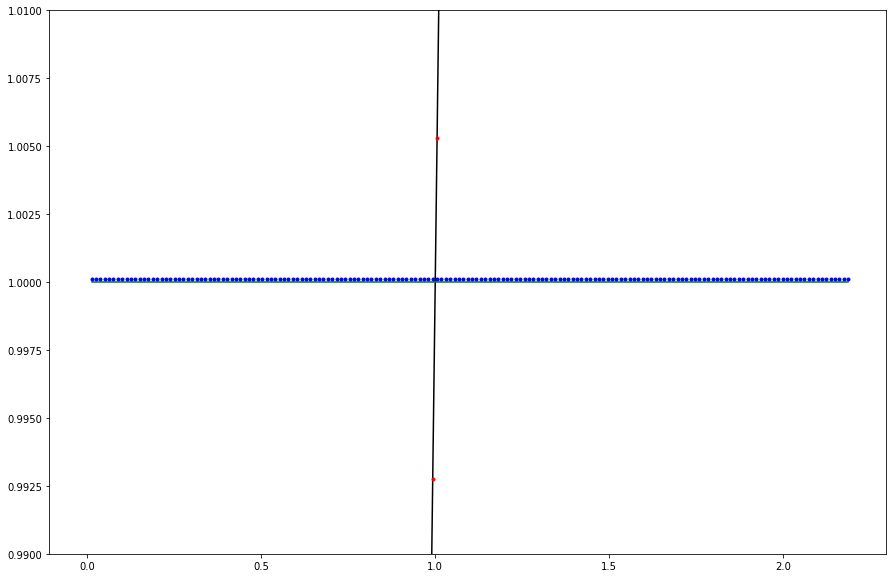

In [ ]:
dx2_fit = [sinfunc(float(t),  *popt) for t in dt]
dx2_myfit = [sinfunc(float(t),  -3.308e-6,0.01693,-1.4645,18.493,-61.16,54.53) for t in dt]

plt.figure(figsize=(15,10))

plt.plot(dt, dx2, 'k-')
plt.plot(dt, dx2_fit, 'r.')
#plt.plot(dt, dx2_myfit, 'b.')
plt.plot(dt[1:], np.array(dx2[1:])/np.array(dx2_fit[1:]), 'g-')
plt.plot(dt[1:], np.array(dx2[1:])/np.array(dx2_myfit[1:]), 'b.')

#plt.plot(dt, adzeta_both_real, 'c.')

axes = plt.gca()
axes.set_ylim([0.99,1.01])

plt.show()

In [ ]:
Nt = 5000 #0
dt = np.arange(0,mpmath.pi,2*mpmath.pi/Nt)
deta_ft = [mpmath.quad(lambda x:mpmath.diff(eta_corrterm,x)*mpmath.sin(x*t),[0,100]) for t in dt]

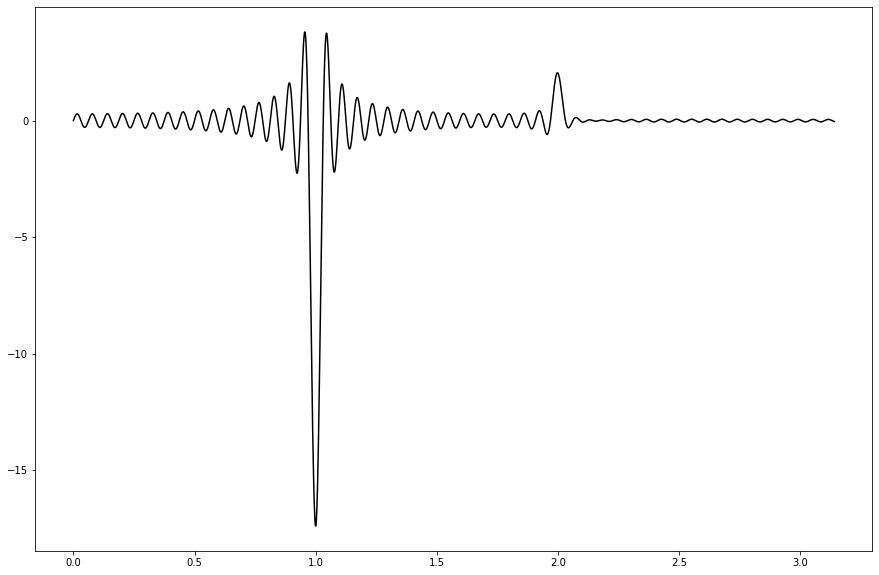

In [ ]:
plt.figure(figsize=(15,10))

plt.plot(dt, deta_ft, 'k-')
#plt.plot(dt, deta_ftl, 'r-')
#plt.plot(dt, dx2_fit, 'r.')
#plt.plot(dt[1:], np.array(dx2[1:])/np.array(dx2_fit[1:]), 'g.')
#plt.plot(dt, adzeta_both_real, 'c.')

axes = plt.gca()
#axes.set_ylim([0.8,1.2])

plt.show()

In [ ]:
deta_ftl = [mpmath.quad(lambda x:mpmath.diff(eta_corrterm,x)*mpmath.sin(x*t),[0,1000]) for t in dt]